📦 Installing seaborn...
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
✅ seaborn installed successfully!
OVERALL METRICS

Accuracy: 0.7000 (70.00%)

Macro Average:
  Precision: 0.5238
  Recall:    0.5833
  F1-Score:  0.5281

Weighted Average:
  Precision: 0.6286
  Recall:    0.7000
  F1-Score:  0.6338

PER-CLASS METRICS

Poor (Class 0):
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  Support:   2 samples

Fair (Class 1):
  Precision: 0.5714
  Recall:    1.0000
  F1-Score:  0.7273
  Support:   4 samples

Good (Class 2):
  Precision: 1.0000
  Recall:    0.7500
  F1-Score:  0.8571
  Support:   4 samples

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         2
        Fair       0.57      1.00      0.73         4
        Good       1.00      0.75      0.86         4

    accuracy                           0.70        10
   macro av

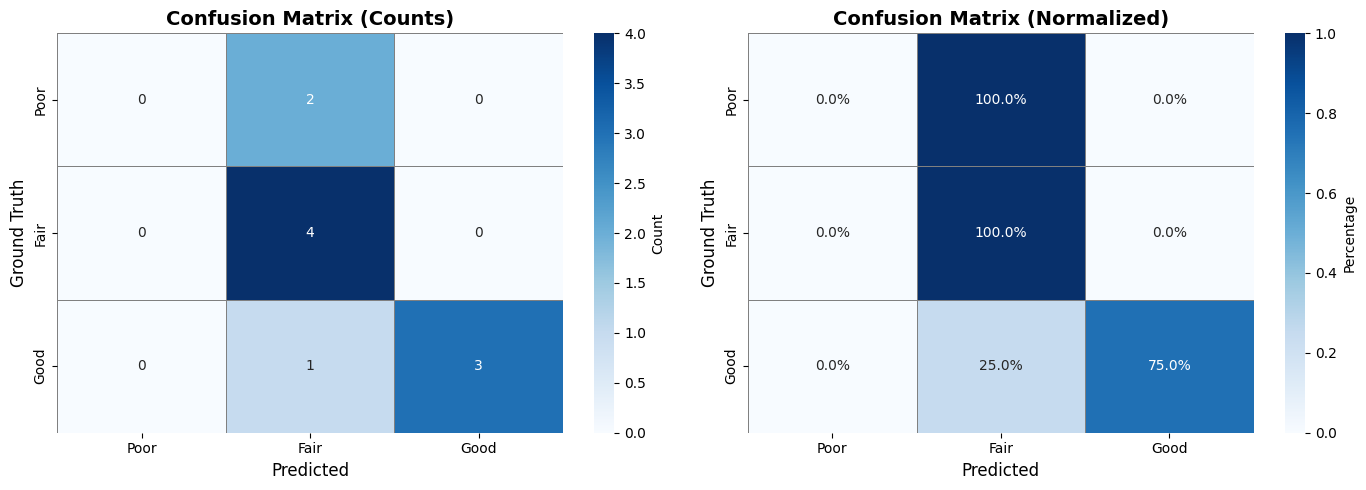


SUMMARY
✅ Correctly classified: 7/10 (70.0%)
❌ Misclassified: 3/10 (30.0%)
🎯 Macro F1-Score: 0.5281
⚖️  Weighted F1-Score: 0.6338


In [ ]:
# Auto-install required packages if missing
import subprocess
import sys

def install_if_missing(package):
    try:
        __import__(package)
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully!")

# Check and install required packages
required_packages = ['numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'pandas']
for package in required_packages:
    # Handle package name differences
    import_name = 'sklearn' if package == 'scikit-learn' else package
    install_if_missing(import_name)

# Now import all libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    classification_report
)
import pandas as pd

# Evaluation data
data = {
    'image': [
        'data/images/001.png',
        'data/images/002.jpg',
        'data/images/003.jpg',
        'data/images/004.jpg',
        'data/images/005.jpg',
        'data/images/006.jpg',
        'data/images/007.jpg',
        'data/images/008.jpg',
        'data/images/009.jpg',
        'data/images/010.jpg',
    ],
    'gt_label': [1, 1, 0, 1, 0, 2, 2, 1, 2, 2],
    'model_output': [1, 1, 1, 1, 1, 2, 2, 1, 2, 1],
    'model_output_raw': [
        'Good/Fair', 'Fair', 'Fair', 'Fair', 'Fair',
        'Good', 'Good', 'Fair', 'Good', 'Good/Fair'
    ]
}

df = pd.DataFrame(data)

# Label mapping
label_map = {
    0: 'Poor',
    1: 'Fair', 
    2: 'Good'
}

# Extract labels
y_true = df['gt_label'].values
y_pred = df['model_output'].values

# Calculate metrics
accuracy = (y_true == y_pred).sum() / len(y_true)
precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

# Print overall metrics
print("="*60)
print("OVERALL METRICS")
print("="*60)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nMacro Average:")
print(f"  Precision: {precision_macro:.4f}")
print(f"  Recall:    {recall_macro:.4f}")
print(f"  F1-Score:  {f1_macro:.4f}")
print(f"\nWeighted Average:")
print(f"  Precision: {precision_weighted:.4f}")
print(f"  Recall:    {recall_weighted:.4f}")
print(f"  F1-Score:  {f1_weighted:.4f}")

# Per-class metrics
print("\n" + "="*60)
print("PER-CLASS METRICS")
print("="*60)
precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)

for i, label in label_map.items():
    if i < len(precision_per_class):
        print(f"\n{label} (Class {i}):")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall:    {recall_per_class[i]:.4f}")
        print(f"  F1-Score:  {f1_per_class[i]:.4f}")
        print(f"  Support:   {(y_true == i).sum()} samples")

# Classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
target_names = [label_map[i] for i in sorted(label_map.keys())]
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

# Misclassified samples
print("="*60)
print("MISCLASSIFIED SAMPLES")
print("="*60)
misclassified = df[df['gt_label'] != df['model_output']]
if len(misclassified) > 0:
    print(f"\nTotal misclassified: {len(misclassified)}/{len(df)}\n")
    for idx, row in misclassified.iterrows():
        print(f"{row['image']}")
        print(f"  Ground Truth: {label_map[row['gt_label']]} ({row['gt_label']})")
        print(f"  Predicted:    {label_map[row['model_output']]} ({row['model_output']})")
        print(f"  Raw Output:   {row['model_output_raw']}\n")
else:
    print("\n✅ Perfect! No misclassifications.")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count-based confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[label_map[i] for i in sorted(label_map.keys())],
            yticklabels=[label_map[i] for i in sorted(label_map.keys())],
            cbar_kws={'label': 'Count'},
            ax=axes[0], linewidths=0.5, linecolor='gray')
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Ground Truth', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='Blues',
            xticklabels=[label_map[i] for i in sorted(label_map.keys())],
            yticklabels=[label_map[i] for i in sorted(label_map.keys())],
            cbar_kws={'label': 'Percentage'},
            ax=axes[1], linewidths=0.5, linecolor='gray', vmin=0, vmax=1)
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Ground Truth', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n📊 Confusion matrix saved to: confusion_matrix.png")
plt.show()

# Summary
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"✅ Correctly classified: {(y_true == y_pred).sum()}/{len(y_true)} ({accuracy*100:.1f}%)")
print(f"❌ Misclassified: {(y_true != y_pred).sum()}/{len(y_true)} ({(1-accuracy)*100:.1f}%)")
print(f"🎯 Macro F1-Score: {f1_macro:.4f}")
print(f"⚖️  Weighted F1-Score: {f1_weighted:.4f}")
print("="*70)


# 📊 CV Model Evaluation Results

## 📈 Overall Metrics

| Metric | Score | Percentage |
|--------|-------|------------|
| **Accuracy** | 0.7000 | **70.00%** |

### Macro Average (treat all classes equally)
| Metric | Score |
|--------|-------|
| Precision | 0.5238 |
| Recall | 0.5833 |
| F1-Score | 0.5281 |

### Weighted Average (account for class imbalance)
| Metric | Score |
|--------|-------|
| Precision | 0.6286 |
| Recall | 0.7000 |
| F1-Score | 0.6338 |

---

## 🎯 Per-Class Performance

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **Poor (0)** | 0.0000 | 0.0000 | 0.0000 | 2 samples |
| **Fair (1)** | 0.5714 | 1.0000 | 0.7273 | 4 samples |
| **Good (2)** | 1.0000 | 0.7500 | 0.8571 | 4 samples |

### 📊 Best/Worst Performance
- 🏆 **Best performing class**: Good (F1=0.8571)
- ⚠️ **Worst performing class**: Poor (F1=0.0000)

---

## 📋 Classification Report
```
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         2
        Fair       0.57      1.00      0.73         4
        Good       1.00      0.75      0.86         4

    accuracy                           0.70        10
   macro avg       0.52      0.58      0.53        10
weighted avg       0.63      0.70      0.63        10
```

---

## ❌ Misclassified Samples

**Total misclassified: 3/10 (30.0%)**

### Error Analysis

1. **data/images/003.jpg**
   - Ground Truth: `Poor (0)`
   - Predicted: `Fair (1)` ❌
   - Raw Output: Fair

2. **data/images/005.jpg**
   - Ground Truth: `Poor (0)`
   - Predicted: `Fair (1)` ❌
   - Raw Output: Fair

3. **data/images/010.jpg**
   - Ground Truth: `Good (2)`
   - Predicted: `Fair (1)` ❌
   - Raw Output: Good/Fair

---

## 💡 Key Findings

- ✅ **Correctly classified**: 7/10 (70%)
- ❌ **Misclassified**: 3/10 (30%)
- 🎯 **Macro F1-Score**: 0.5281
- ⚖️ **Weighted F1-Score**: 0.6338
- ⚠️ **Main issue**: Model cannot detect "Poor" condition (0% recall)
- 🔍 **All "Poor" images are misclassified as "Fair"**

---

## 🖼️ Visualizations

Confusion matrix saved to: `confusion_matrix.png`